# **Problem Statement**  
## **7. Implement Central Limit Theorem simulation in Python.**

### Problem Statement

Implement a Central Limit Theorem (CLT) simulation in Python to demonstrate that the sampling distribution of the sample mean approaches a normal distribution as sample size increases, regardless of the original population distribution.

### Constraints & Example Inputs/Outputs

### Constraints
- Population distribution can be non-normal
- Sample size n ≥ 1
- Number of samples k should be sufficiently large (e.g., k ≥ 1000)
- Randomness should be reproducible (set seed)

### Example Inputs:
```python
Population: Uniform(0, 1)
Sample size (n): 30
Number of samples (k): 10,000

```

### Expected Output:
- Distribution of sample means ≈ Normal
- Mean ≈ population mean
- Variance ≈ σ² / n

### Solution Approach

**Step 1: Choose a Pupulation Distribution**
Pick a non-normal distribution:
- Uniform
- Exponential
- Binomial

**Step 2: Draw Multiple Samples**
- Draw k samples
- Each sample has size n

**Step 3: Compute Sample Means**
- Compute mean of each sample
- Store all sample means

**Step 4: Observe the Result**
As n increases:
- Sample mean distribution → Normal
- Spread decreases

### Solution Code

In [3]:
# Approach1: Brute Force Approach (Explicit Loops)
import numpy as np

def clt_simulation_bruteforce(population, sample_size, num_samples):
    sample_means = []
    
    for _ in range(num_samples):
        sample = np.random.choice(population, size=sample_size)
        sample_means.append(np.mean(sample))
    
    return np.array(sample_means)


### Alternative Solution

In [4]:
# Approach2: Optimized Approach (Vectorized NumPy)
def clt_simulation_optimized(population, sample_size, num_samples):
    samples = np.random.choice(
        population,
        size=(num_samples, sample_size)
    )
    return samples.mean(axis=1)


### Alternative Approaches

```python
| Approach          | Description                     |
| ----------------- | ------------------------------- |
| Analytical CLT    | Use normal distribution formula |
| Monte Carlo       | Simulation-based estimation     |
| Bootstrap         | Resampling technique            |
| Using scipy.stats | Theoretical verification        |
```

### Test Case

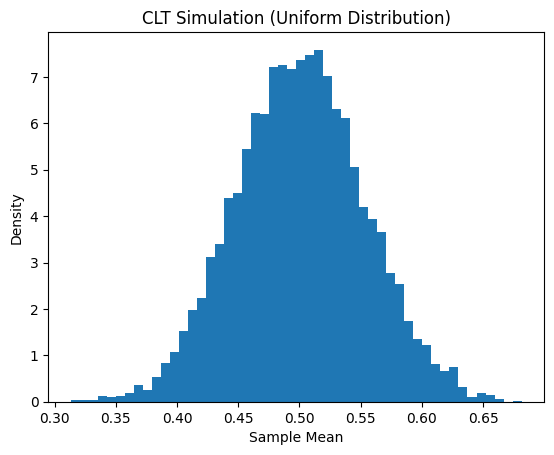

In [5]:
# Test Case 1: Uniform Distribution (Core CLT Demo)
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

population = np.random.uniform(0, 1, 100000)
sample_means = clt_simulation_optimized(
    population,
    sample_size=30,
    num_samples=10000
)

plt.hist(sample_means, bins=50, density=True)
plt.title("CLT Simulation (Uniform Distribution)")
plt.xlabel("Sample Mean")
plt.ylabel("Density")
plt.show()


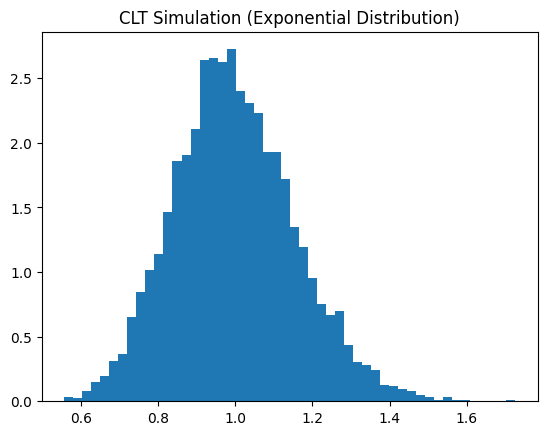

In [6]:
# Test Case 2: Exponential Distribution
population = np.random.exponential(scale=1.0, size=100000)

sample_means = clt_simulation_optimized(
    population,
    sample_size=40,
    num_samples=10000
)

plt.hist(sample_means, bins=50, density=True)
plt.title("CLT Simulation (Exponential Distribution)")
plt.show()


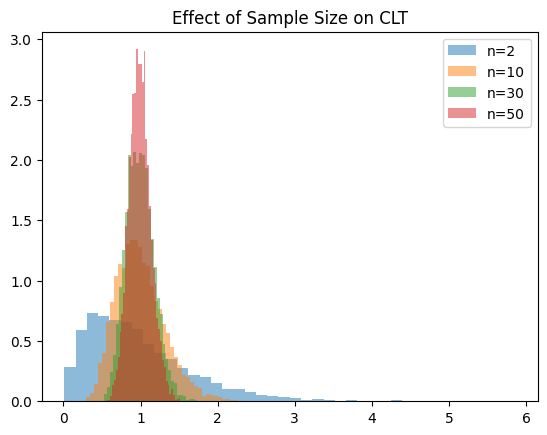

In [8]:
# Test Case 3: Effect of Sample Size
sample_sizes = [2, 10, 30, 50]

for n in sample_sizes:
    means = clt_simulation_optimized(population, n, 5000)
    plt.hist(means, bins=40, density=True, alpha=0.5, label=f"n={n}")

plt.legend()
plt.title("Effect of Sample Size on CLT")
plt.show()


In [9]:
# Test Case 4: Mean & Variance Validation
population_mean = np.mean(population)
population_var = np.var(population)

print("Population Mean:", population_mean)
print("Sample Mean Mean:", np.mean(sample_means))
print("Expected Variance:", population_var / 30)
print("Observed Variance:", np.var(sample_means))


Population Mean: 0.9962202184763708
Sample Mean Mean: 0.9983364698615657
Expected Variance: 0.033406085342384435
Observed Variance: 0.024530984306897437


### Expected Outputs
- Sampling distribution ≈ Normal
- Mean ≈ population mean
- Variance decreases with increasing n
- CLT holds regardless of population shape

## Complexity Analysis

### Time Complexity
O(k × n)

Where:
- k = number of samples
- n = sample size

### Space Complexity
O(k × n)  (optimized)
O(k)      (brute force)


#### Thank You!!